In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
df.columns


Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [6]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
for col in df.columns:
    print(f'counts in {col}:\n{df[col].value_counts()}')

counts in gender:
gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64
counts in age:
age
80.00    5621
51.00    1619
47.00    1574
48.00    1568
53.00    1542
         ... 
0.48       83
1.00       83
0.40       66
0.16       59
0.08       36
Name: count, Length: 102, dtype: int64
counts in hypertension:
hypertension
0    92515
1     7485
Name: count, dtype: int64
counts in heart_disease:
heart_disease
0    96058
1     3942
Name: count, dtype: int64
counts in smoking_history:
smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64
counts in bmi:
bmi
27.32    25495
23.00      103
27.12      101
27.80      100
24.96      100
         ...  
58.23        1
48.18        1
55.57        1
57.07        1
60.52        1
Name: count, Length: 4247, dtype: int64
counts in HbA1c_level:
HbA1c_level
6.6    8540
5.7    8413
6.5    8362
5.8    8321
6.0    8295
6.2

In [8]:
df.isna().mean()

gender                 0.0
age                    0.0
hypertension           0.0
heart_disease          0.0
smoking_history        0.0
bmi                    0.0
HbA1c_level            0.0
blood_glucose_level    0.0
diabetes               0.0
dtype: float64

In [9]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [10]:
dff=df
duplicate_feature = dff.duplicated().sum()
print('duplicates:',duplicate_feature)
dff=dff.drop_duplicates()
duplicate_feature= dff.duplicated().sum()
print('after clean:',duplicate_feature)

duplicates: 3854
after clean: 0


In [11]:
dff.shape

(96146, 9)

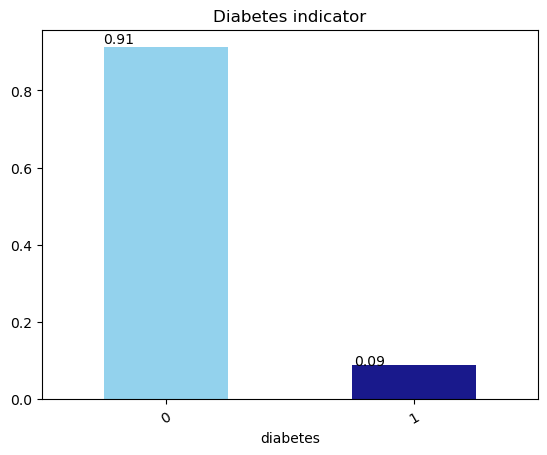

In [12]:
ax = dff.diabetes.value_counts(normalize=True).plot(kind='bar',color=['skyblue','navy'],alpha=0.9,rot=30)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)),(p.get_x()*1.01,p.get_height()*1.01))
plt.title("Diabetes indicator")
plt.show()

In [13]:
features=df.select_dtypes(include="number").columns

for col in features:
    Q1_col,Q3_col=df[col].quantile([0.25,0.75])
    iqr=Q3_col-Q1_col
    low_limit=Q1_col-1.5*iqr
    upper_limit=Q3_col+1.5*iqr
    outlier=[]
    for x in df[col]:
         if ((x> upper_limit) or (x<low_limit)):
            outlier.append(x)
    if len(outlier)==0:
        print(f" * -- >> there No outlier in {col} feature")
    else:
        print(f"Ther outlier in this feature {col}")

    print(f"Q1 of {col} --->>> {Q1_col} \n Q3 of {col} ---->>> {Q3_col} \n iqr--->>{iqr}\n low_limit--->>>{low_limit} \n  upper_limit--->>> {upper_limit}  \n Number of outliers --->>> {len(outlier)}")
    print("-"*50)

 * -- >> there No outlier in age feature
Q1 of age --->>> 24.0 
 Q3 of age ---->>> 60.0 
 iqr--->>36.0
 low_limit--->>>-30.0 
  upper_limit--->>> 114.0  
 Number of outliers --->>> 0
--------------------------------------------------
Ther outlier in this feature hypertension
Q1 of hypertension --->>> 0.0 
 Q3 of hypertension ---->>> 0.0 
 iqr--->>0.0
 low_limit--->>>0.0 
  upper_limit--->>> 0.0  
 Number of outliers --->>> 7485
--------------------------------------------------
Ther outlier in this feature heart_disease
Q1 of heart_disease --->>> 0.0 
 Q3 of heart_disease ---->>> 0.0 
 iqr--->>0.0
 low_limit--->>>0.0 
  upper_limit--->>> 0.0  
 Number of outliers --->>> 3942
--------------------------------------------------
Ther outlier in this feature bmi
Q1 of bmi --->>> 23.63 
 Q3 of bmi ---->>> 29.58 
 iqr--->>5.949999999999999
 low_limit--->>>14.705 
  upper_limit--->>> 38.504999999999995  
 Number of outliers --->>> 7086
--------------------------------------------------
Ther ou

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


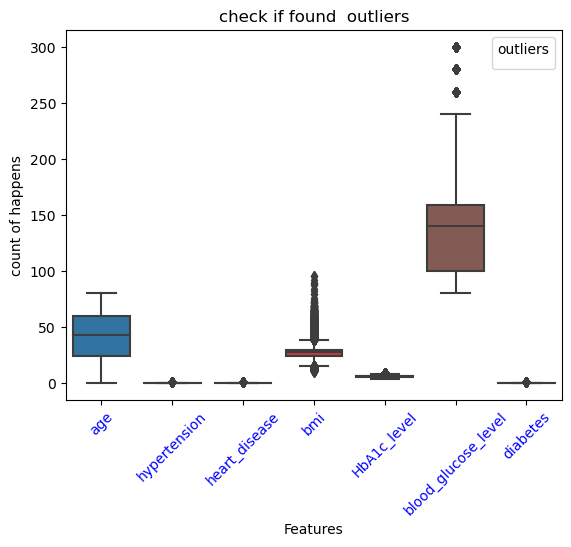

In [14]:
plt.title("check if found  outliers")
plt.xlabel("Features")
plt.ylabel("count of happens")
plt.xticks(rotation=45,color="b")
sns.boxplot(df[features])
plt.legend(title="outliers",prop={'size': 10})

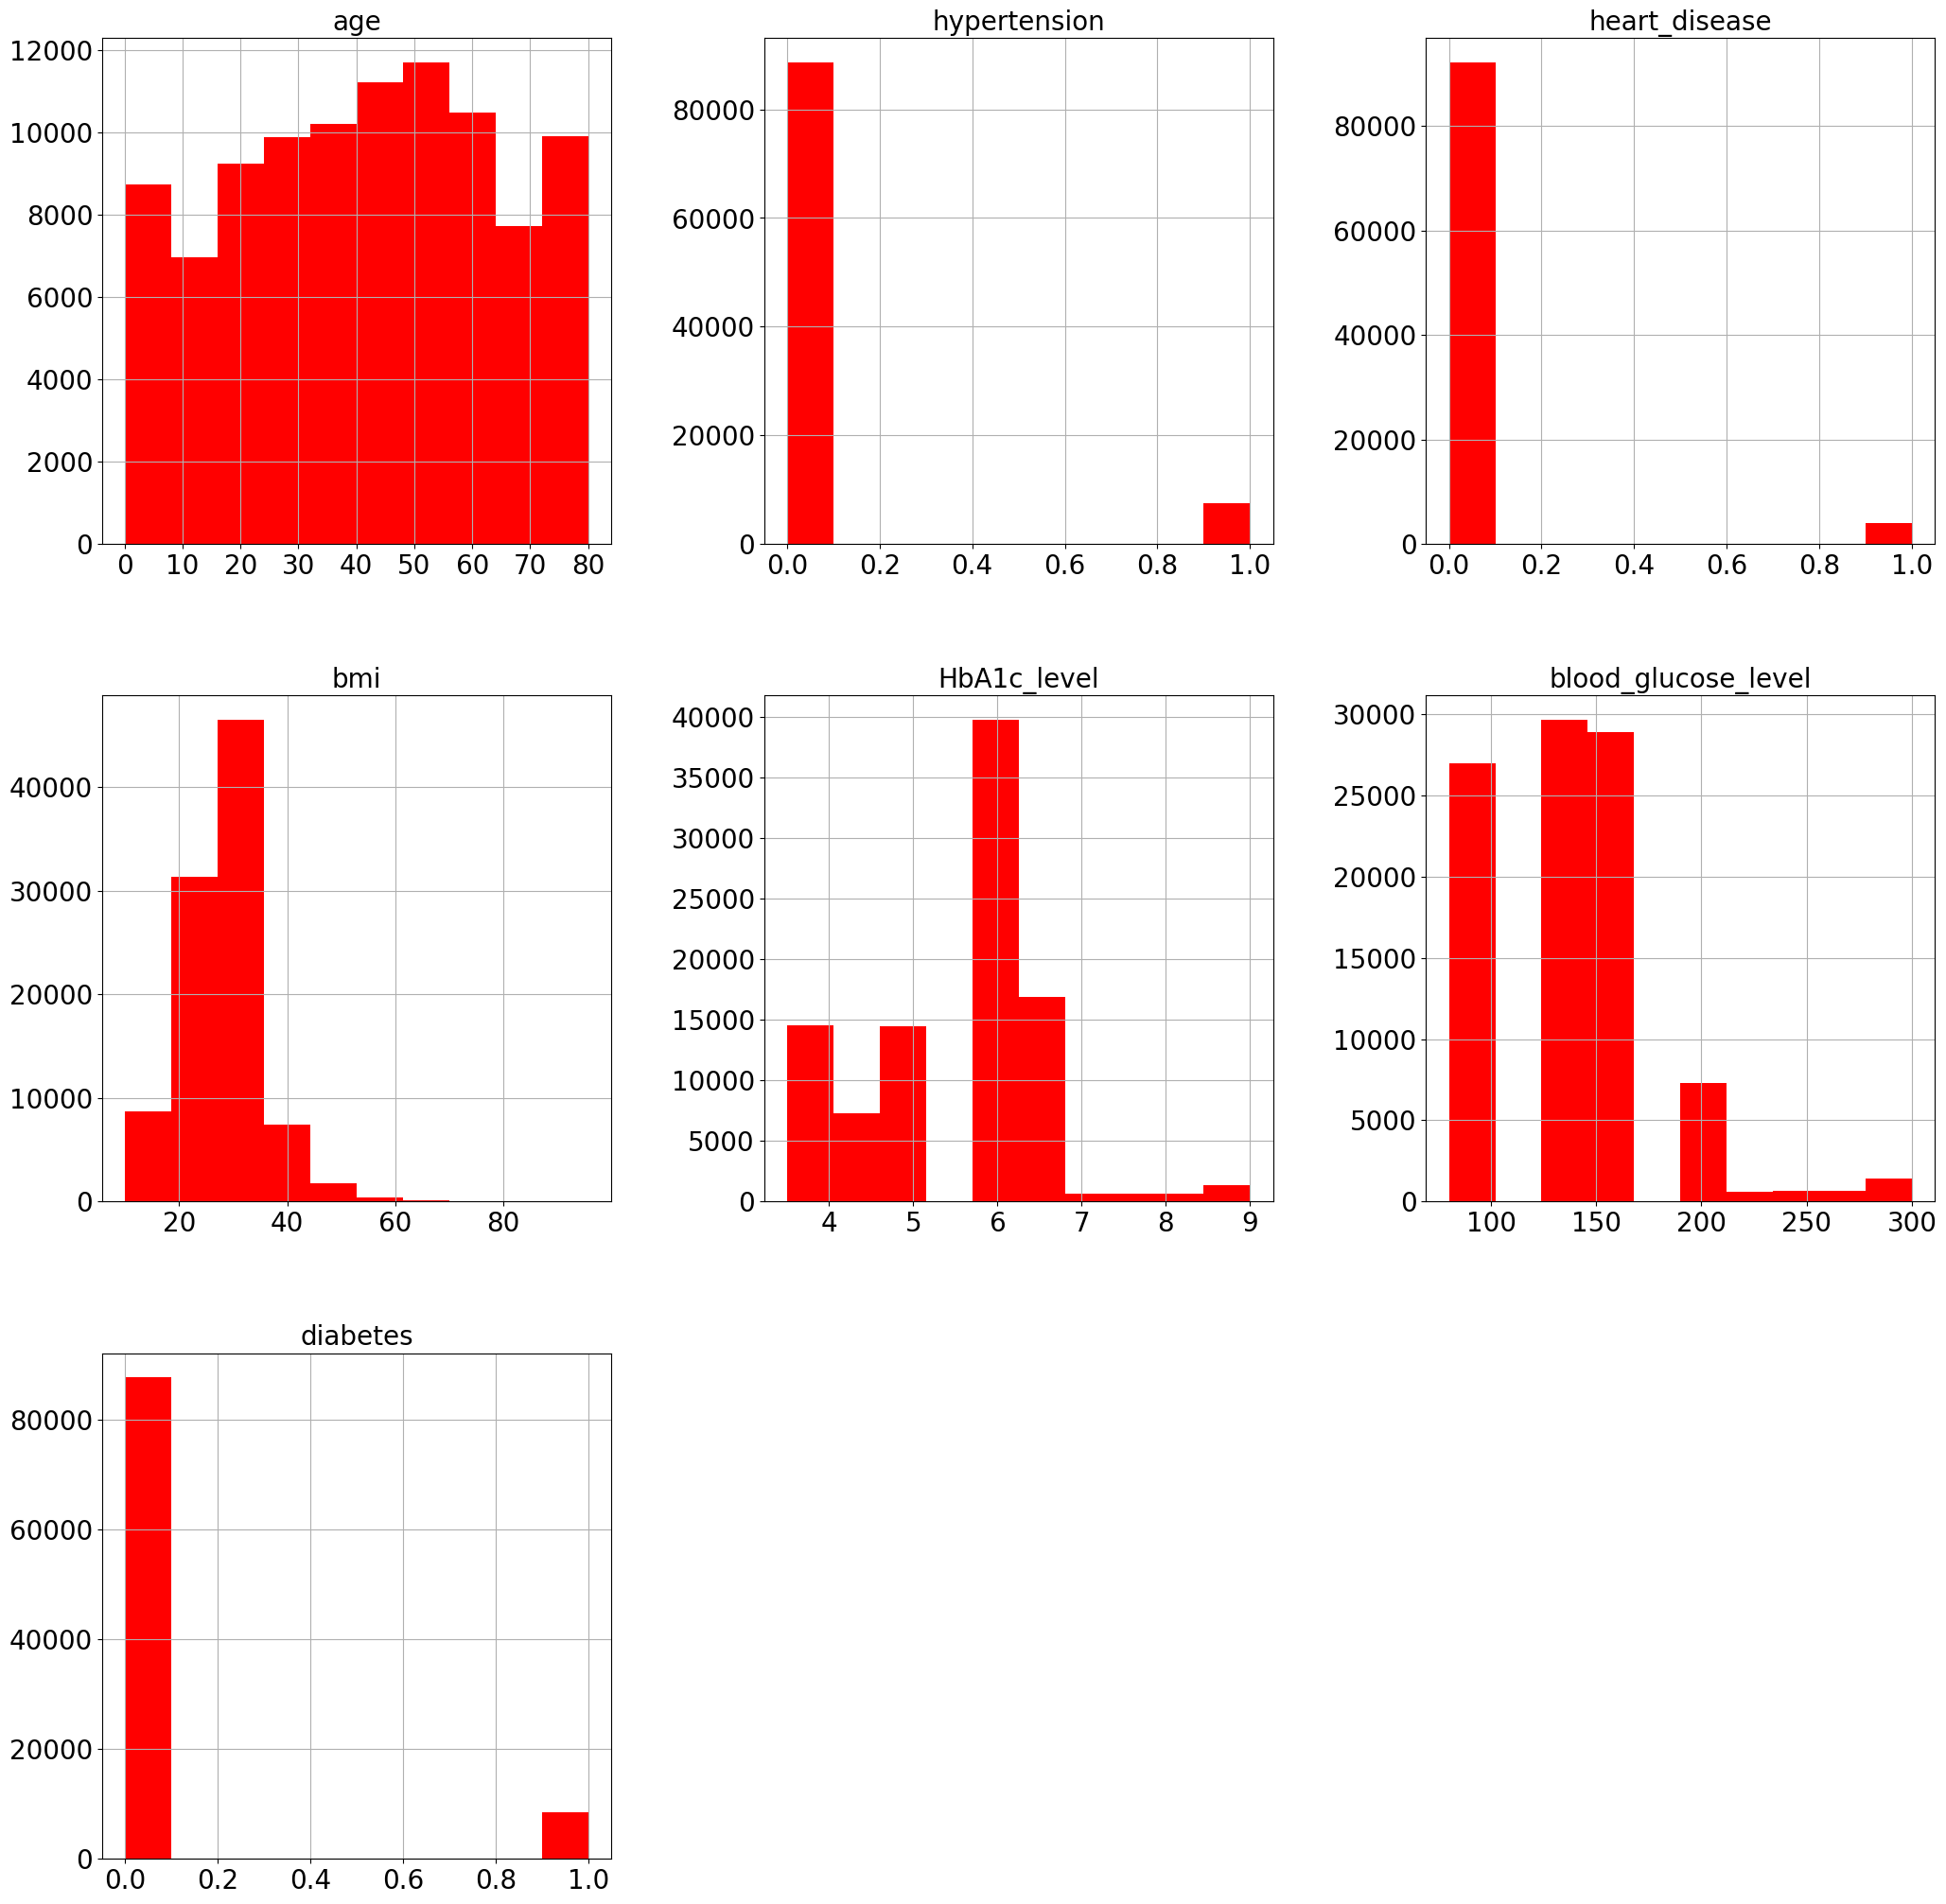

In [15]:

ax=dff.hist(figsize=(25,25),color="r",xlabelsize=20,ylabelsize=20)
for row in ax:
    for subplot in row:
        subplot.title.set_fontsize(20)


In [16]:
df.select_dtypes('object').columns

Index(['gender', 'smoking_history'], dtype='object')

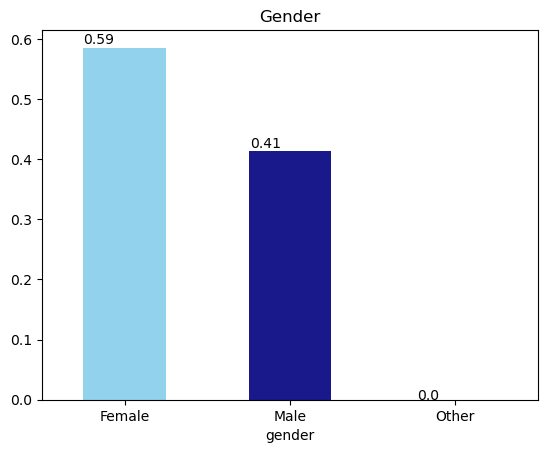

In [17]:
ax = df.gender.value_counts(normalize=True).plot(kind='bar',color=['skyblue','navy'],alpha=0.9,rot=0)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)),(p.get_x()*1.01,p.get_height()*1.01))
plt.title("Gender")
plt.show()

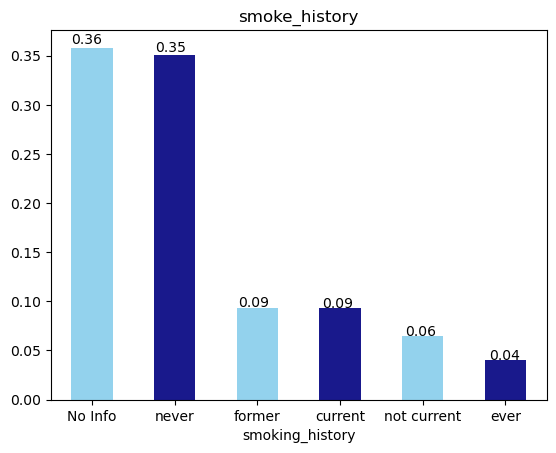

In [18]:
ax = df.smoking_history.value_counts(normalize=True).plot(kind='bar',color=['skyblue','navy'],alpha=0.9,rot=0)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)),(p.get_x()*1.01,p.get_height()*1.01))
plt.title("smoke_history")
plt.show()

In [19]:
df.select_dtypes('int64').columns

Index(['hypertension', 'heart_disease', 'blood_glucose_level', 'diabetes'], dtype='object')

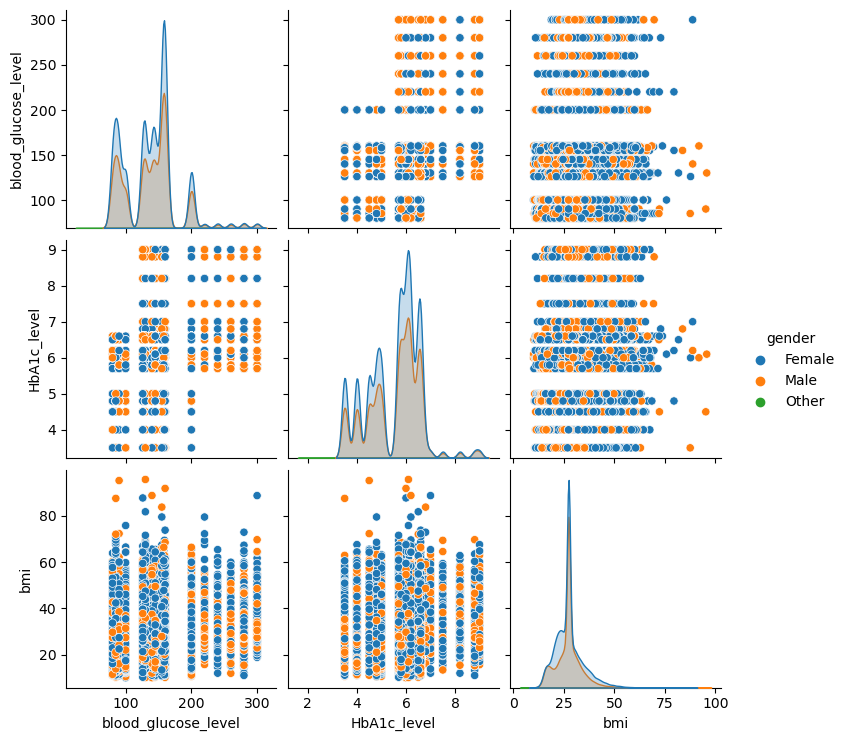

In [20]:
sns.pairplot(data=df,vars=('blood_glucose_level','HbA1c_level','bmi'),hue='gender')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix ,ConfusionMatrixDisplay,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer


In [22]:
label_encoder = LabelEncoder()
    
for col in df.columns:
    df[col] = label_encoder.fit_transform(df[col])
    
df


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,101,0,1,4,1334,11,6,0
1,0,75,0,0,0,1547,11,0,0
2,1,49,0,0,4,1547,5,9,0
3,0,57,0,0,1,1160,4,8,0
4,1,97,1,1,1,829,3,8,0
...,...,...,...,...,...,...,...,...,...
99995,0,101,0,0,0,1547,9,2,0
99996,0,23,0,0,0,552,10,3,0
99997,1,87,0,0,3,1598,5,8,0
99998,0,45,0,0,4,2357,1,3,0


In [23]:
x = df.drop(columns='diabetes',axis=1)
y = df['diabetes']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

print('x_train.shape:',x_train.shape)
print('x_test.shape:',x_test.shape)
print('y_train.shape:',y_train.shape)

x_train.shape: (80000, 8)
x_test.shape: (20000, 8)
y_train.shape: (80000,)


In [24]:
 
categorical_features =x_train.select_dtypes("object").columns
numeric_features = x_train.select_dtypes("number").columns

# Print the features to ensure they are correctly identified
print("Categorical Features:", categorical_features)
print("Numeric Features:", numeric_features)

# Create preprocessing pipelines for both numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

Categorical Features: Index([], dtype='object')
Numeric Features: Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level'],
      dtype='object')


In [25]:
lg = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42,max_depth=5)
RF = RandomForestClassifier(random_state=42)
KNN = KNeighborsClassifier(n_neighbors=2)
ADaboost = AdaBoostClassifier(random_state=42)

In [26]:
pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('knn', KNN)
])

pipeline_random_forest = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('random_forest', RF)
])

pipeline_decision_tree = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('decision_tree', dt)
])

pipeline_logistic_regression = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('logistic_regression', lg)
])

pipeline_Adboost_classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ADboost', ADaboost)
])

In [27]:
pipeline_knn.fit(x_train, y_train)
pipeline_random_forest.fit(x_train, y_train)
pipeline_decision_tree.fit(x_train, y_train)
pipeline_logistic_regression.fit(x_train, y_train)
pipeline_Adboost_classifier.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('ADboost', AdaBoostClassifier(random_state=42))])

Model: KNeighborsClassifier(n_neighbors=2)
Model Accuracy: 96.10%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18292
           1       0.93      0.58      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.95      0.79      0.85     20000
weighted avg       0.96      0.96      0.96     20000

--------------------------------------------------


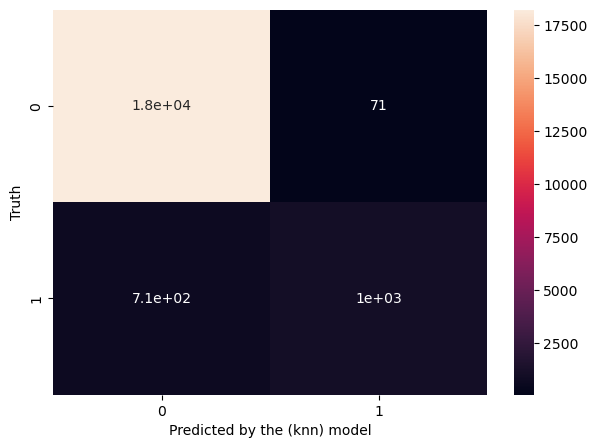

Model: RandomForestClassifier(random_state=42)
Model Accuracy: 97.08%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000

--------------------------------------------------


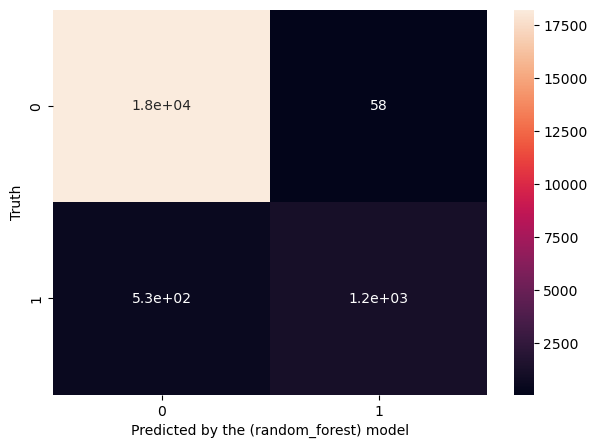

Model: DecisionTreeClassifier(max_depth=5, random_state=42)
Model Accuracy: 97.21%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       1.00      0.67      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.99      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000

--------------------------------------------------


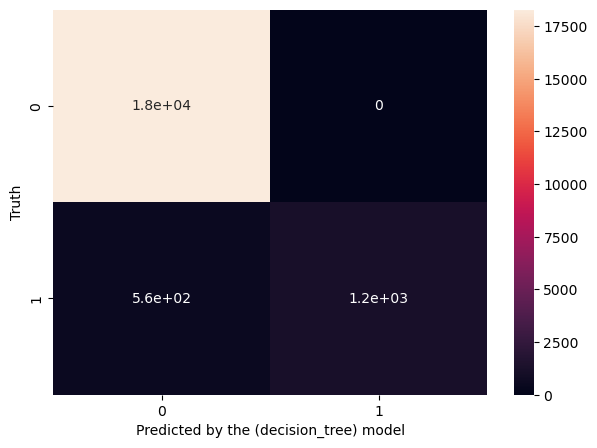

Model: LogisticRegression(random_state=42)
Model Accuracy: 94.98%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     18292
           1       0.80      0.55      0.65      1708

    accuracy                           0.95     20000
   macro avg       0.88      0.77      0.81     20000
weighted avg       0.95      0.95      0.95     20000

--------------------------------------------------


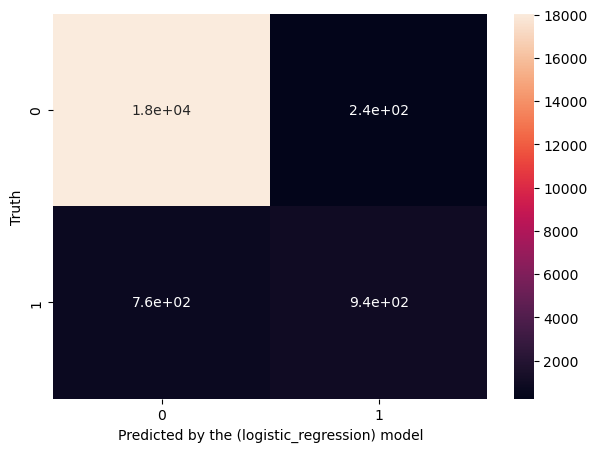

Model: AdaBoostClassifier(random_state=42)
Model Accuracy: 97.21%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.97      0.70      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.97      0.85      0.90     20000
weighted avg       0.97      0.97      0.97     20000

--------------------------------------------------


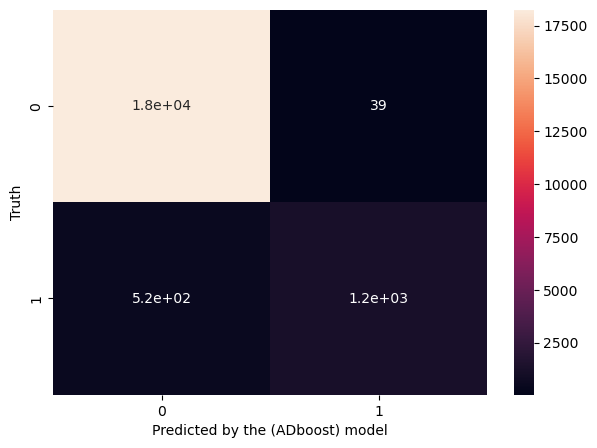

In [28]:
def evaluate_pipeline(pipeline, X_test, y_test):
    y_pred = pipeline.predict(X_test)
    acc = pipeline.score(X_test, y_test)
    cm = confusion_matrix(y_test, y_pred)
    classif_report = classification_report(y_test, y_pred)
    
    print(f"Model: {pipeline.steps[-1][1]}")
    print(f"Model Accuracy: {acc * 100:.2f}%")
    print("\nClassification Report:")
    print(classif_report)
    print("-" * 50)
    
    # Plot the confusion matrix
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True)
    plt.xlabel(f"Predicted by the ({pipeline.steps[-1][0]}) model")
    plt.ylabel('Truth')
    plt.show()

# Evaluate each pipeline
evaluate_pipeline(pipeline_knn, x_test, y_test)
evaluate_pipeline(pipeline_random_forest, x_test, y_test)
evaluate_pipeline(pipeline_decision_tree, x_test, y_test)
evaluate_pipeline(pipeline_logistic_regression, x_test, y_test)
evaluate_pipeline(pipeline_Adboost_classifier, x_test, y_test)

In [29]:
ax=acc.bar(figsize=(25,25),color="r",xlabelsize=20,ylabelsize=20)
for row in ax:
    for subplot in row:
        subplot.title.set_fontsize(20)

NameError: name 'acc' is not defined